# O que é o desafio da Orange telecom? 
---

Explicando churn, appetency, up-selling e machine learning.

>Você já ouviu falar daquele aplicativo chamado Pokemon Go? 

>O Pokemon Go teve um hype no mercado, só que para pegar os pokemons era necessário sair andando pelas ruas, e muitas pessoas precisavam, por exemplo, passar 8 horas dentro de um escritório. Quando elas percebiam isso, rapidamente desinstalavam o app e cancelavam a sua conta.

>Quando você baixa um app, acaba usando o serviço por 3 dias e, por algum motivo, cancela a conta e o desinstala, isso tem um nome dentro da área de marketing das empresas, chama-se **taxa de rotatividade** ou **churn rate**.

>Agora vamos pensar em outra situação. 

>Se você já usou Uber, você sabe que também tem um serviço do Uber chamado Uber eats, certo? O que aconteceu com o Uber eats, foi que várias pessoas que gostavam do Uber começaram a usá-lo. 

>Quando você já gosta de um serviço e começa a utilizar outros serviços da mesma empresa, para o marketing isso também tem um nome, que significa o quanto aquele produto ou serviço agrada o seu paladar, é a sua **apetência** ou **appetency**.

>Além de churn rate e appetency, podemos ter outra situação.

>Você deve ter ou conhecer alguém que tem conta na Nubank. Quando você se cadastra nesse banco digital, eles te dão a opção de participar de um programa de recompensas para que você ganhe pontos. Para fazer esse cadastro, você precisa pagar uma taxa adicional pelo serviço. Mas, é claro, você só vai estar disposto a comprar mais alguma coisa caso esteja satisfeito com as funções básicas que o banco oferece.

>Esse tipo de oferta também tem um nome dentro do marketing, são as vendas adicionais ou **up-selling**.

>Agora que você já conhece churn rate, appetency e up-selling e sabe que são algumas métricas sobre clientes analisadas pelo departamento de marketing, podemos falar de uma empresa de telecom chamada **Orange**.

>Essa empresa lançou um desafio em 2009 que envolvia essas taxas. Eles queriam descobrir, para algumas contas, quais as probabilidades de seus clientes terem churn, de seus produtos terem appetency e de fazer up-selling. 

>Só que esses números que eles querem descobrir não estão em uma planilha, então iremos usar dados antigos de outras contas que já temos para tentar advinhar quais são as taxas futuras. E faremos isso usando um computador para encontrá-las.

>Logo, a máquina vai entender quais são esses padrões de clientes, e, para isso, vamos usar **machine learning** ou aprendizagem de máquina para ensiná-la.






# Obtendo des-zipando os dados

---
Explicando wget e unzip.


>O primeiro passo para ensinar a máquina é usar algo que ela entenda: números. Precisamos de dados sobre esses clientes e de dados sobre essas três taxas.

>A Orange disponibilizou esses dados no desafio, mas como os dados estão em um site, precisamos baixá-los. Para isso vamos usar o comando **!wget**.

>Repare que alguns dos dados estão zipados, então também vamos extrair os arquivos com o comando **!unzip**.

In [2]:
!wget https://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train.data.zip https://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train_appetency.labels https://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train_churn.labels https://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train_upselling.labels https://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_test.data.zip

--2019-09-08 03:08:46--  https://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train.data.zip
Resolving www.kdd.org (www.kdd.org)... 72.10.51.228
Connecting to www.kdd.org (www.kdd.org)|72.10.51.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8424904 (8.0M) [application/zip]
Saving to: ‘orange_small_train.data.zip’

orange_small_train. 100%[===================>]   8.03M  2.67MB/s    in 3.0s    

2019-09-08 03:08:50 (2.67 MB/s) - ‘orange_small_train.data.zip’ saved [8424904/8424904]

--2019-09-08 03:08:50--  https://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train_appetency.labels
Reusing existing connection to www.kdd.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 199110 (194K) [text/plain]
Saving to: ‘orange_small_train_appetency.labels’

orange_small_train_ 100%[===================>] 194.44K  --.-KB/s    in 0.003s  

2019-09-08 03:08:50 (72.3 MB/s) - ‘orange_small_train_appetency.labels’ saved [199110/199110]

--2019-09-08 03:

In [3]:
!unzip -o orange_small_train.data.zip 
!unzip -o orange_small_test.data.zip

Archive:  orange_small_train.data.zip
  inflating: orange_small_train.data  
 extracting: orange_small_train.data.cksum  
Archive:  orange_small_test.data.zip
  inflating: orange_small_test.data  
 extracting: orange_small_test.data.cksum  


# Fazendo o import das bibliotecas


---
Explicando sobre as bibliotecas e pacotes do python.

>Agora que já temos os dados, precisamos achar um jeito de ensinar a máquina a lê-los, mas não adianta falarmos com ela em português, temos que usar uma linguagem que ela entenda, então faremos isso usando uma linguagem de programação chamada **Python**.

>O Python tem diversas coleções de códigos prontos ou bibliotecas que já podemos usar para fazer isso, uma delas é chamada de **Pandas**. 

>Pandas é uma biblioteca do Python cujo foco é nos ajudar na análise de dados. 

>Para usá-la precisamos importá-la com **import** e vamos dar um apelido para ela também que é **pd**.

>Ainda, como o pandas usa outra biblioteca chamada **numpy**, vamos importá-la também como **np**.

In [0]:
import pandas as pd
import numpy as np

# Lendo e guardando os dados

---


Usando pandas para ler os dados de treino, de destino e os guardando nas variáveis.

>Legal, agora podemos usar pd quando precisamos de algo do pandas. 

>A primeira coisa que vamos fazer é pedir para ele ler os arquivos que baixamos com **pd.read_csv**. 

>Você pode ter estranhado isso, pois o nosso arquivo tem extensão **.data** e não **.csv**. Mas mesmo que o nosso arquivo não seja do tipo csv, podemos abri-lo e ver que ele é delimitado por **tab**, usando **sep='\t'**. 

>Desse modo, passamos um separador, fazendo com que o pandas o leia direitinho.

>Os primeiros dados que temos são os das contas dos clientes da Orange devidamente anonimizados, e, para dizer quais clientes dessas contas deram churn, tiveram upselling ou appetency, temos também as marcações ou **labels**.

>Então, temos os dados de contas e as marcações. Vamos ler e salvar todos eles. 

In [0]:
dados_contas = pd.read_csv('orange_small_train.data', sep='\t')

marcacoes_upselling = pd.read_csv('orange_small_train_upselling.labels', header=None)
marcacoes_appetency = pd.read_csv('orange_small_train_appetency.labels', header=None)
marcacoes_churn = pd.read_csv('orange_small_train_churn.labels', header=None)

# Explorando os dados


---

Obtendo informações sobre os dados de contas e os dados de destino.

>Bacana, agora que temos todos os nossos dados, vamos enteder melhor quais são eles, ou explorá-los. 

>Vamos começar pelos dados das contas.

>Nesse ponto, o pandas também vai nos ajudar com algumas funções. A primeira que vamos usar será para obter informações sobre esses dados. 

> Veja que usando **.info()** sabemos que temos 50.000 entradas, 230 colunas e tipos de dados variados entre ponto flutuante, inteiros e objetos.

## Dados de contas


In [6]:
dados_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB


>Além disso, podemos olhar para esses dados, mas não precisamos carregar todas as 50000 entradas. 

>Fazemos isso usando **.head()** e passando o número de linhas que queremos ver, vou passar 5.

In [7]:
dados_contas.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,...,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,...,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,...,NaN,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,NaN,uKAI,L84s,UbxQ8lZ,NaN,TTGHfSv,NaN,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,jg69tYsGvO,RO12,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,NaN,uKAI,Mtgm,NhsEn4L,NaN,NaN,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,NaN,NaN,3216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,80.0,NaN,4.0,64.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,SJs3duv,NaN,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


>Repare que ao fazermos isso, podemos perceber que há dados que possuem um valor que não conseguimos definir ou representar, dizemos que esses valores **não são um número**, em inglês, **Not a Number**, o que é abreviado para **NaN**.

## Plotando a quantidade de NaN

>Como uma máquina entende números, pode ser que esses valores nos causem problemas. Mas será que eles são muitos ou poucos?

>Podemos ter uma idéia da sua quantidade usando um gráfico ou visualização. Eu escolhi usar um mapa que vai nos mostrar quais as áreas com mais ou menos NaN, chamado **heatmap**.

>Para fazermos o heatmap vamos usar outras bibliotecas e pacotes do python, como **seaborn** e **matplotlib**, então vamos importá-las.

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

>Além de importá-las, como estamos usando o notebook do Google collab, precisamos atualizar a versão do seaborn. 

>Para fazermos isso usamos o instalador de pacotes do python chamado **pip**, pedindo para que ele atualize o seaborn com **--upgrade** para a versão 0.9.0.

In [9]:
print(sns.__version__)
!pip3 install --upgrade seaborn==0.9.0

0.9.0
Requirement already up-to-date: seaborn==0.9.0 in /usr/local/lib/python3.6/dist-packages (0.9.0)


>Agora podemos começar a montar o nosso heatmap.

>Queremos saber qual a quantidade de NaNs, então vamos peguntar para o pandas se temos esses valores com **isnull()**, quando isso acontecer, o seaborn vai fazer com que a área do heatmap fique mais clara. 

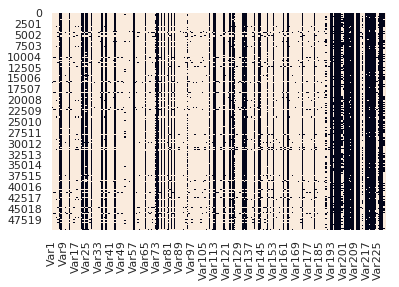

In [10]:
sns.heatmap(dados_contas.isnull(), cbar=False)
plt.show()

>Repare que grande parte das colunas como 0, 7, 14 até 185 são praticamente preenchidas com NaN, e como vamos fazer uma computação com um valor que não temos? 

>Perceba que ter vários NaN dificulta a nossa análise.

>Já demos uma olhada nos nossos dados de contas, agora vamos entender nossas marcações.

>Para isso, vamos também obter informações com .info, tanto para o up-selling quanto para appetency e churn.

>Veja que ao usarmos .info fica claro que temos também 50.000 dados, então que eles correspondem aos nossos dados de contas. 

>Repare também que, diferentemente dos dados das contas, todos os valores das marcações são inteiros, o que as faz uniformes no tipo.

## Upselling

In [11]:
marcacoes_upselling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
0    50000 non-null int64
dtypes: int64(1)
memory usage: 390.7 KB


>Além de .info, podemos também descrever os nossos dados usando **.describe()**.

>Ao fazermos isso, precebemos que os valores mínimos das nossas labels são -1 e que os máximos são +1, o que mostra que eles variam entre -1 e 1.

In [12]:
marcacoes_upselling.describe()

,0
count,50000.000000
mean,-0.852720
std,0.522373
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


>E é sempre uma boa idéia visualizar para sabermos como estão esses valores de -1 e 1, se estão mais ou menos balanceados. 

>Para isso, podemos fazer um gráfico com o seaborn chamado **distplot**.

>Ao fazermos o distplot percebemos que temos muito mais valores negativos do que positivos e que nossos dados não estão distribuídos de uma maneira uniforme.

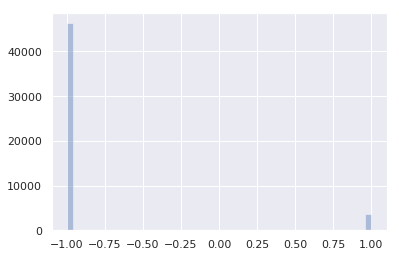

In [13]:
sns.distplot(marcacoes_upselling, kde = False)
plt.show()

>Agora que já sabemos interpretar a visualização das marcações e a entendê-las com info e describe, vamos repetir o que fizemos para upselling para appetency e churn.

## Apettency

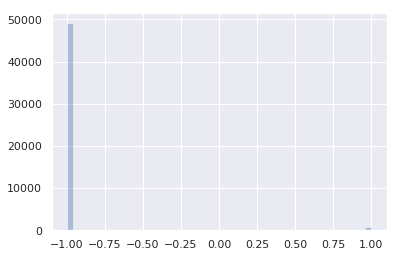

In [14]:
sns.distplot(marcacoes_appetency, kde=False)
plt.show()

In [15]:
marcacoes_appetency.describe()

,0
count,50000.00000
mean,-0.96440
std,0.26445
min,-1.00000
25%,-1.00000
50%,-1.00000
75%,-1.00000
max,1.00000


In [16]:
marcacoes_appetency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
0    50000 non-null int64
dtypes: int64(1)
memory usage: 390.7 KB


## Churn

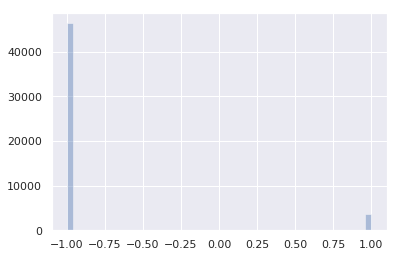

In [17]:
sns.distplot(marcacoes_churn, kde=False)
plt.show()

In [18]:
marcacoes_churn.describe()

,0
count,50000.00000
mean,-0.85312
std,0.52172
min,-1.00000
25%,-1.00000
50%,-1.00000
75%,-1.00000
max,1.00000


In [19]:
marcacoes_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
0    50000 non-null int64
dtypes: int64(1)
memory usage: 390.7 KB


>Tendo explorado os nossos dados de contas e nossas marcações, nos dados de contas podemos ver que precisaremos dar um jeito nos valores indefinidos, naqueles que são object ou float e não inteiros  e também no imbalanceamento das marcações.

# Manipulando os dados


---



>Vamos começar com os dados de contas.

>Uma coisa que a Orange conta para a gente sobre os dados de contas do desafio é que as 190 primeiras entradas são de números e que as 40 últimas são de palavras ou nomes.

>Conseguimos usar os números na nossa análise caso eles não sejam NaN, mas não conseguimos usar as palavras. 

>Então vamos começar dividindo os dados de contas entre aqueles que tem números ou **numéricos** e os que tem nomes ou categorias, portanto, são **categóricos**.

>Para isso, vamos pegar as 190 primeiras colunas dos dados de contas e salvar como dados numéricos e as últimas 40 e salvar como dados categóricos.

>Para saber mais informações sobre as classificações dos dados, veja o meu post no blog da Alura: https://blog.alura.com.br/classificando-os-tipos-mais-comuns-de-dados/

In [0]:
dados_numericos = dados_contas[dados_contas.columns[:190]]
dados_categoricos = dados_contas[dados_contas.columns[-40:]]

>Podemos ter dividido os dados, mas ainda temos que lidar com os NaN. 

>Então vamos dar uma olhada no heatmap de cada um deles para entender como isso está. Repare que temos muitos NaN nos dados numéricos e também nos categóricos. O que será que vamos fazer com isso?

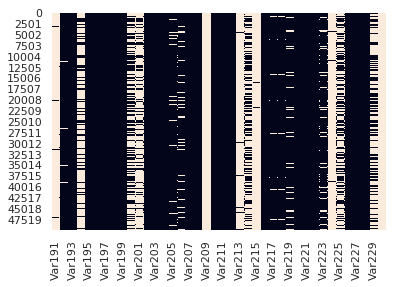

In [21]:
sns.heatmap(dados_categoricos.isnull(), cbar=False)
plt.show()

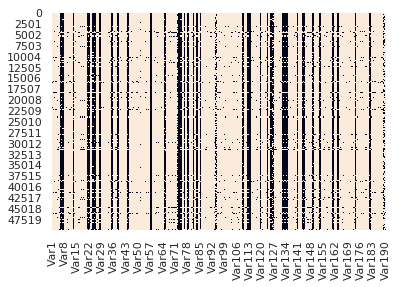

In [22]:
sns.heatmap(dados_numericos.isnull(), cbar=False)
plt.show()

## Limpando os dados


---



>Uma saída é identificar onde estão esses NaN e trocá-los por alguma coisa que conseguimos entender.

>Ao fazermos isso estaríamos entrando com dados ou **imputando** dados no lugar de valores indefinidos. Para isso, temos uma estrutura chamada de **imputador simples** ou simple imputer numa biblioteca chamada **sklearn**.

>Vamos usar esse simple imputer para identificar os valores NaN e trocá-los por um valor constante. Estamos escolhendo essa estratégia pois temos colunas inteiras com NaN, e as outras estratégias descartam essas colunas quando elas são totalmente preenchidas por NaN. 

>Para configurar o simple imputer, passamos **np.nan** para que ele identifique os NaN como valores que faltam (ou **missing_values**) e constante (ou **constant**) como estratégia.

>Para aplicarmos o simple imputer, primeiro adequamos os NaN a nossa estratégia com **fit** e depois substituímos seus valores, transformando os dados com **transform**. Para agilizar esse processo, usaremos os dois juntos em **fit_transform**.

###Aplicando imputer para dados numéricos

In [0]:
from sklearn.impute import SimpleImputer

imputer_para_dados_numericos = SimpleImputer(missing_values=np.nan, strategy='constant')
dados_numericos_com_imputer = imputer_para_dados_numericos.fit_transform(dados_numericos)

>Como os nossos dados categóricos também possuem valores NaN, também iremos aplicar o simple imputer neles.

###Aplicando Simple Imputer para dados categóricos

In [0]:
imputer_para_dados_categoricos = SimpleImputer(missing_values=np.nan, strategy='constant')
dados_categoricos_com_imputer = imputer_para_dados_categoricos.fit_transform(dados_categoricos)

>Conseguimos resolver os NaN, mas o que podemos fazer com a diferença de tipos de dados que temos nos dados de contas?

>Vamos olhar para um exemplo. Repare que na coluna chamada **Var193** (caso não se lembre, basta digitar *dados_categoricos.head(5)*), nessa coluna temos quatro linhas em que está escrito "RO12" e uma na qual está escrito "AERks4I" e se pudéssemos também substrituir esses valores sem perdermos essas características?

>Para igualarmos os tipos de dados, poderíamos substituir "RO12" pelo número 5 e "AERks4I" por 3, por exemplo.

>Calma, não vamos calcular ou codificar as 40 colunas na mão, podemos usar uma outra estrutura do **sklearn** chamada codificador ou **encoder**.

### Aplicando Label Encoder para dados categóricos

>Para fazermos isso, vamos também usar uma função ou método chamado **fit_transform** só que vamos primeiro transformar os dados categóricos depois do imputer em uma estrutura de dados ou **DataFrame** do pandas. 

>Eu não contei isso para você antes, mas sempre que usamos o .head, .info e outras coisas do pandas, estamos mexendo em sua estrutura de data frame. 

In [0]:
df_dados_categoricos_com_imputer = pd.DataFrame(list(dados_categoricos_com_imputer))

>Feito isso, como temos muitas colunas, precisamos passar cada uma delas pelo **encoder**. 

>Então escrevemos que para (ou **for**) cada índice de cada **coluna** (que é um item dos dados categóricos com encoder), cada uma dessas colunas é codificada.

In [0]:
from sklearn.preprocessing import LabelEncoder

dados_categoricos_com_encoder = df_dados_categoricos_com_imputer.copy()

for indice,coluna in dados_categoricos_com_encoder.iteritems():
  dados_categoricos_com_encoder[indice] = LabelEncoder().fit_transform(coluna)

>Desse modo, agora temos os nossos dados devidamente com valores numéricos. Você pode dar um .head() e conferir.

In [27]:
dados_categoricos_com_encoder.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0,225,25,3,22,0,177,3302,4016,12115,1,3682,0,28,1,11,10,0,0,5,0,44,1,12298,1,788,12237,1,11,94,4,2964,3,1,2,22,2,8,1,0
1,0,91,25,3,22,0,13,3697,4891,12115,1,4422,0,79,3,21,10,0,0,5,0,33,1,12298,1,1317,11063,2,11,10,4,125,0,1,2,14,2,8,1,0
2,0,248,5,1,22,0,157,1686,4901,14525,2,448,0,37,1,11,5,0,0,5,0,42,1,7211,1,1612,8473,0,11,1293,0,1610,3,1,1,10,0,25,0,0
3,0,269,25,3,22,0,203,2575,362,12115,1,2953,0,57,1,16,10,0,0,5,1,33,1,12298,1,1425,9161,0,11,1444,4,817,0,1,2,7,2,8,1,0
4,0,131,25,1,22,0,209,971,2399,249,2,5512,0,43,3,3,10,0,0,5,0,44,1,6952,1,6,3834,0,11,1731,4,65,0,1,1,7,2,8,2,0


>Previamente separamos os dados das contas em categóricos e numéricos, agora que tiramos os NaNs e codificamos os dados categóricos de maneira específica, vamos juntá-los novamente.



## Juntando os dados da conta

>Para isso, vamos pegar os nossos dados numéricos com imputer e os dados categóricos com encoder e juntá-los empilhando horizontalmente usando o **hstack** do numpy.

>Como manipulamos esses dados, vou chamá-los de dados de treino pré processados.

>Vou transformá-los em um dataframe do pandas para darmos uma olhada neles.

In [0]:
dados_contas_pre_processados = np.hstack((dados_numericos_com_imputer, dados_categoricos_com_encoder))

In [0]:
df_dados_contas_pre_processados = pd.DataFrame(list(dados_contas_pre_processados))

In [30]:
df_dados_contas_pre_processados.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229
0,0.0,0.0,0.0,0.0,0.0,1526.0,7.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,464.0,580.0,0.0,14.0,128.0,0.0,0.0,166.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3570.0,0.0,0.0,...,0.0,225.0,25.0,3.0,22.0,0.0,177.0,3302.0,4016.0,12115.0,1.0,3682.0,0.0,28.0,1.0,11.0,10.0,0.0,0.0,5.0,0.0,44.0,1.0,12298.0,1.0,788.0,12237.0,1.0,11.0,94.0,4.0,2964.0,3.0,1.0,2.0,22.0,2.0,8.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,210.0,0.0,2.0,24.0,0.0,0.0,353.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4764966.0,0.0,0.0,...,0.0,91.0,25.0,3.0,22.0,0.0,13.0,3697.0,4891.0,12115.0,1.0,4422.0,0.0,79.0,3.0,21.0,10.0,0.0,0.0,5.0,0.0,33.0,1.0,12298.0,1.0,1317.0,11063.0,2.0,11.0,10.0,4.0,125.0,0.0,1.0,2.0,14.0,2.0,8.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5236.0,7.0,0.0,0.0,0.0,0.0,0.0,904.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1212.0,1515.0,0.0,26.0,816.0,0.0,0.0,220.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5883894.0,0.0,0.0,...,0.0,248.0,5.0,1.0,22.0,0.0,157.0,1686.0,4901.0,14525.0,2.0,448.0,0.0,37.0,1.0,11.0,5.0,0.0,0.0,5.0,0.0,42.0,1.0,7211.0,1.0,1612.0,8473.0,0.0,11.0,1293.0,0.0,1610.0,3.0,1.0,1.0,10.0,0.0,25.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,269.0,25.0,3.0,22.0,0.0,203.0,2575.0,362.0,12115.0,1.0,2953.0,0.0,57.0,1.0,16.0,10.0,0.0,0.0,5.0,1.0,33.0,1.0,12298.0,1.0,1425.0,9161.0,0.0,11.0,1444.0,4.0,817.0,0.0,1.0,2.0,7.0,2.0,8.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1029.0,7.0,0.0,0.0,0.0,0.0,0.0,3216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,80.0,0.0,4.0,64.0,0.0,0.0,200.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,131.0,25.0,1.0,22.0,0.0,209.0,971.0,2399.0,249.0,2.0,5512.0,0.0,43.0,3.0,3.0,10.0,0.0,0.0,5.0,0.0,44.0,1.0,6952.0,1.0,6.0,3834.0,0.0,11.0,1731.0,4.0,65.0,0.0,1.0,1.0,7.0,2.0,8.0,2.0,0.0


>Olhando para os nossos dados, podemos perceber que temos valores dentro de uma faixa que vai de 0 até, por exemplo, 1610, ou até mais do que isso, como 5236. Sendo que 1610 e 5236 são números bem altos. 

>Repare que, se tivéssemos valores que fossem de 0 até 1, teríamos uma faixa com números menores, o que seria mais fácil de computar. Então, podemos processá-los mais um pouco para deixá-los entre 0 e 1 e facilitar para que a nossa máquina aprenda.

>Faremos isso usando um outro recurso do sklearn que é o **escalar** (de escala mesmo) de mínimos e máximos chamado **MinMax**. O que esse escalar vai fazer é deixar os nossos valores entre 0 e 1.

## Usando MinMax Scaler

In [0]:
from sklearn.preprocessing import MinMaxScaler

escalar = scaler = MinMaxScaler(feature_range=(0, 1))
dados_contas_pre_processados_escalares = (escalar.fit_transform(dados_contas_pre_processados))

In [0]:
df_dados_contas_pre_processados = pd.DataFrame(list(dados_contas_pre_processados_escalares))

In [33]:
df_dados_contas_pre_processados.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229
0,0.0,0.0,0.0,0.0,0.0,0.011582,0.05,0.0,0.0,0.0,0.0,0.0,0.000930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012792,0.012792,0.0,0.028340,0.009721,0.0,0.0,0.044674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000189,0.0,0.0,...,0.0,0.623269,0.5,1.000000,1.0,0.0,0.786667,0.769697,0.791642,0.785923,0.5,0.644495,0.0,0.282828,0.333333,0.523810,0.769231,0.0,0.0,1.0,0.0,0.5500,1.0,0.797794,1.0,0.391067,0.874696,0.5,0.5,0.021911,0.666667,0.690909,0.75,1.0,0.666667,1.000000,0.333333,0.275862,0.25,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003984,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004632,0.004632,0.0,0.004049,0.001823,0.0,0.0,0.080453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252825,0.0,0.0,...,0.0,0.252078,0.5,1.000000,1.0,0.0,0.057778,0.861772,0.964124,0.785923,0.5,0.774024,0.0,0.797980,1.000000,1.000000,0.769231,0.0,0.0,1.0,0.0,0.4125,1.0,0.797794,1.0,0.653598,0.790779,1.0,0.5,0.002331,0.666667,0.029138,0.00,1.0,0.666667,0.636364,0.333333,0.275862,0.25,0.0
2,0.0,0.0,0.0,0.0,0.0,0.039739,0.05,0.0,0.0,0.0,0.0,0.0,0.004569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033414,0.033414,0.0,0.052632,0.061968,0.0,0.0,0.054916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312194,0.0,0.0,...,0.0,0.686981,0.1,0.333333,1.0,0.0,0.697778,0.393007,0.966095,0.942264,1.0,0.078418,0.0,0.373737,0.333333,0.523810,0.384615,0.0,0.0,1.0,0.0,0.5250,1.0,0.467791,1.0,0.800000,0.605647,0.0,0.5,0.301399,0.000000,0.375291,0.75,1.0,0.333333,0.454545,0.000000,0.862069,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.017024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.745152,0.5,1.000000,1.0,0.0,0.902222,0.600233,0.071358,0.785923,0.5,0.516891,0.0,0.575758,0.333333,0.761905,0.769231,0.0,0.0,1.0,1.0,0.4125,1.0,0.797794,1.0,0.707196,0.654825,0.0,0.5,0.336597,0.666667,0.190443,0.00,1.0,0.666667,0.318182,0.333333,0.275862,0.25,0.0
4,0.0,0.0,0.0,0.0,0.0,0.007810,0.05,0.0,0.0,0.0,0.0,0.0,0.016253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001764,0.001764,0.0,0.008097,0.004860,0.0,0.0,0.051073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.362881,0.5,0.333333,1.0,0.0,0.928889,0.226340,0.472896,0.016153,1.0,0.964817,0.0,0.434343,1.000000,0.142857,0.769231,0.0,0.0,1.0,0.0,0.5500,1.0,0.450989,1.0,0.002978,0.274053,0.0,0.5,0.403497,0.666667,0.015152,0.00,1.0,0.333333,0.318182,0.333333,0.275862,0.50,0.0


>Agora que nossos dados estão pré-processados, podemos começar a usá-los. Mas como? 

>Se vamos usar esse dados para ensinar a nossa máquina, podemos pensar em como a gente aprende. Se você for lá para a escola, temos aulas, praticamos o conteúdo e depois desse treino, fazemos um teste.

>Quando falamos de aprendizagem de máquina, é a mesma coisa. 

>Então de todos os nossos dados, vamos pegar uma parte deles que usaremos para treinar, ou **dados de treino**, e uma outra parte dos dados que serão usados para testá-lo, ou os  **dados de teste**. 

>Tanto os dados de treino quanto o de teste são subconjuntos dos dados de contas e das marcações.

>Mas repare em uma coisa, temos três marcações (ou targets): appetency, churn e upselling. O que significa que vamos prever três targets ao invés de uma, por isso, vamos fazer essa divisão para cada uma delas.

>Como estou usando um notebook e temos a parte visual, vou fazer as três aqui mesmo, mas você pode otimizar esse código fazendo uma função.

##Appetency


---

Dividindo os dados em treino e teste para appetency.

>Para fazer essa divisão vamos continuar usando o scikit-learn. Vou fazer o import do método **train_test_split** que já divide os dados para a gente em treino e teste.

>Comumente em machine learning ou data science, chamamos os dados de **X** e os targets de **y**, então a primeira coisa que vou fazer é passar os dados de contas para o nosso X e cada uma das marcações para o y.

>Agora vou usar o train_test_split para dividir o X e o y entre treino e teste. Mas como vou fazer essa divisão, não é mesmo? Consigo dizer para o método qual o tamanho do teste que eu quero, então vou dizer que vai ser um **test_size** de 33%, restando 77% para treino.

>Um detalhe importante para o método é fazer com que os nossos targets tenham uma dimensão, para isso vou usar uma função do numpy chamada **.ravel()**. 

In [0]:
from sklearn.model_selection import train_test_split

X = df_dados_contas_pre_processados.values
y_appetency = marcacoes_appetency.values

X_treino_appetency, X_teste_appetency, y_treino_appetency, y_teste_appetency = train_test_split(X, y_appetency.ravel(), test_size=0.33, random_state=23)

##Churn

In [0]:
X = df_dados_contas_pre_processados.values
y_churn = marcacoes_churn.values

X_treino_churn, X_teste_churn, y_treino_churn, y_teste_churn = train_test_split(X, y_churn.ravel(), test_size=0.33, random_state=23)

##Upselling

In [0]:
X = df_dados_contas_pre_processados.values
y_upselling = marcacoes_upselling.values

X_treino_upselling, X_teste_upselling, y_treino_upselling, y_teste_upselling = train_test_split(X, y_upselling.ravel(), test_size=0.33, random_state=23)

>Beleza, agora já temos divisões de treino e teste para cada um dos nossos targets, podemos começar a ensinar de fato a nossa máquina.

>Mas ensinar como? Bom, eu disse que a máquina entendia números, então, por lidarem com números, a matemática e a probabilidade vão nos ajudar bastante. 

>O modo como ensinamos uma máquina é usando algumas funções matemáticas que configuram um **modelo probabilístico**. 

>O que nos vamos fazer não é criar esse modelo do 0, mas usar alguns modelos que o scikit learn já disponibiliza para a gente.

>Vamos passar os dados de treino e teste para esse modelo e depois entender o quanto conseguimos predizer as nossas targets.

>Vamos começar com a target appetency.

#Criando, treinando e medindo os modelos


---

>O primeiro modelo que vamos criar é chamado de **complementar naive bayes** ou *Complement NB*. Vamos usá-lo pois ele se adapta bem à dados desbalanceados, que é o nosso caso.

>Quando vamos dizer se uma conta considerou algum produto da Orange com appetency ou não, estamos fazendo uma classificação desse produto, certo? Se ele tem ou não appetency. Portando, após criarmos o modelo com **ComplementNB()**, vamos chamá-lo de **classificador**, ou na sua versão abreviada, de **clf**.



##Appetency

###Predição com Complement NB

>Após criarmos o nosso classificador, precisamos passar os dados de treino para ele aprendê-los, fazemos isso **adequando** o classificador à esses dados com **fit**.

>Feito isso, vamos adivinhar ou **prever** os resultados para o teste com **predict**.





In [0]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB()
clf.fit(X_treino_appetency, y_treino_appetency.ravel())

predicao_complement_nb_appetency = clf.predict(X_teste_appetency)

>Agora nos já ensinamos e testamos o classificador. Como vamos saber se ele é bom?

>No desafio, a Orange diz que a métrica para saber o quão bem passamos no teste, ou o quanto a nossa predição é boa é a **AUC**. 

>Mas o que é a AUC? 

>Quando classificamos os nossos dados, podemos ter uma probabilidade alta de termos uma determinada marcação para eles, mas a marcação real ser outra,  o que chamamos de  **falso positivo**, assim como termos uma marcação que não é a marcação real deles com uma probabilidade muito alta, ou **falsos negativos**. O modo de saber sobre esses falsos positivos e negativos é com algo chamado **característica do receptor da informação** ou **ROC**.

>E, quando fazemos um gráfico, a ROC é uma curva, por ela ser uma curva, tem uma área debaixo dessa curva. Essa área é a AUC, do ingês *area under de curve* ou **área debaixo da curva**.

>Mas e aí, quanto será que o nosso classificador é bom? Para isso, vamos calcular a AUC.

###Métrica AUC com Complement NB

>Iremos importar a biblioteca de métricas do scikit learn e calcular a curva ROC para a appetency com o complementNB. Esse cálculo nos devolve os falsos positivos, os positivos verdadeiros e os valores limite da curva. 

>Feito isso, vamos usar os falsos positivos e os verdadeiros positivos para calcular a AUC, e pronto, sabemos que 0.645, ou 65% das vezes o nosso classificador acertou a classificação.

>Então sabemos que o nosso classificador ficou um pouco acima da média ou dos 50%, o que podemos melhorar. Por isso, vamos considerar o Complement NB como o classificador base. Aquele ao qual vamos comparar os dados dos outros classificadores.

In [38]:
from sklearn import metrics

falso_positivo_cnb_appetency, positivo_cnb_appetency, valores_limite_cnb_appetency = metrics.roc_curve(y_teste_appetency, predicao_complement_nb_appetency)
auc_complement_nb_appetency = metrics.auc(falso_positivo_cnb_appetency, positivo_cnb_appetency)
print(auc_complement_nb_appetency)

0.6454923892839037


### Plotando a curva ROC do Complement NB

>Para visualizarmos a curva ROC, basta passarmos os falsos e verdadeiros positivos, como fizemos aqui.

>Podemos ver que não fomos muito bem nesse teste, pois uma boa curva ROC ficará próxima do ponto 1.0 que fica no eixo vertical acima e a esquerda.

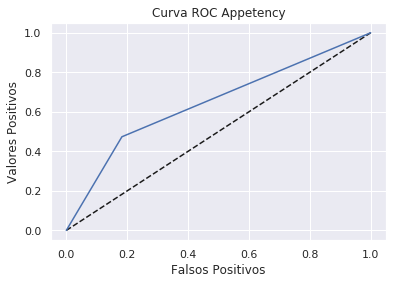

In [39]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(falso_positivo_cnb_appetency, positivo_cnb_appetency)
plt.xlabel('Falsos Positivos')
plt.ylabel('Valores Positivos')
plt.title('Curva ROC Appetency')
plt.show()

>Temos o nosso classificador base agora, e podemos inclusive repeti-lo para nossos outros targets, só que algo pode ir acontecendo com a nossa métrica.

>A medida em que vamos treinando o nosso modelo, ele vai aprendendo as respostas, e as aprende tão bem que pode decorá-las, sempre acertando o resultado.

>Quando isso acontece, chamamos de **sobreajuste** ou *overfitting*. 

>E qual o problema do overfitting? Quando o classificador se ajusta demais aos dados de treino, ele não consegue entender outros dados, fica viciado, então ele começa a se sair muito mal nos testes.

>Mas temos um jeito de resolver isso. Uma das estratégias para evitar o overfitting é uma técnica chamada **validação cruzada** ou *cross validation*.

>A cross validation, abreviada como **cv**, divide os dados de treino em grupos menores, pega parte desses grupos para treinar o classificador e testa o modelo com os grupos que sobram.  

>Ao fazer isso, garantimos que uma parcela menor dos dados de treinamento sejam dados ao classificador, evitando que ele se vicie, e garantimos que ele será avaliado com base nos dados de treino e teste.

>Até agora, temos a métrica AUC calculada apenas para appetency e classificada com o nosso classificador base, mas podemos usar cross validation com ele, ver os resultados para a AUC e repetir para as outras marcações.

### Resultado com cross validation

>Para usar cross validation, vamos importá-lo do sklearn.

>Criamos também nosso classificador, passamos os valores de treino e teste e dissemos que queríamos a divisão em 5 grupos. Aqui também já podemos calcular a AUC dentro do cross validation, passando que a métrica (*scoring*) vai ser a AUC.

>Vou salvar os resultados em **resultados_cvs_appetency** (cvs de cross validation score), isso porque a validacao cruzada devolve um resultado para cada grupo. 

>Feito isso, para saber o quão bem fomos, iremos fazer a média desses resultados com **.mean()**.

In [0]:
from sklearn.model_selection import cross_val_score

clf = ComplementNB()

resultados_cvs_appetency = cross_val_score(clf, X_treino_appetency, y_treino_appetency.ravel(), cv=5, scoring='roc_auc')

media_resultados_cvs_appetency = resultados_cvs_appetency.mean()

In [41]:
media_resultados_cvs_appetency

0.7468995012747665

>Feito isso, já sabemos como nos prevenir do overfitting, mas não precisamos usar apenas o classificador base, podemos testar outros tipos de classificadores para saber se o resultado deles não chega mais próximo de 1 (equivalente à 100%).

>Para fazermos isso, vou criar um vetor para guardarmos esses resultados para appetency, salvando nele a média dos resultados do cross validation com o nome de **complement_nb**.

In [0]:
resultados_cross_validation_appetency = []

In [0]:
resultados_cross_validation_appetency.append(('Complement NB', media_resultados_cvs_appetency))

>Agora podemos ver como nos saímos com outros classificadores. 

>Um outro classificador que podemos usar para comparar com a nossa base é o **Ada Boost**. Esse classificador permite que a gente ajuste configurações internas para classificarmos os nossos dados ainda melhor.

>Ele faz isso criando cópias dele mesmo e treinando com os nossos dados, mas entre uma cópia e outra, entende o que não foi tão bem na classificação e ajusta esses valores para que a próxima seja melhor. Esses valores são os **pesos** ou *weights* do nosso modelo. 

>Para usarmos o Ada Boost, faremos da mesma maneira que o Complement NB. Impotando o classificador, criando o classificador, fazendo a validação cruzada, tirando a média dos resultados e guardando no array.

### Cross validation com Adaboost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

resultados_adab = cross_val_score(clf, X_treino_appetency, y_treino_appetency.ravel(), cv=5, scoring='roc_auc')

media_resultados_adab_appetency = resultados_adab.mean()

In [0]:
resultados_cross_validation_appetency.append(('Ada Boost', media_resultados_adab_appetency))

>Bacana, agora temos os dados de dois classificadores, vamos usar um último para desempatar.

>Para esse último, eu escolhi o **Random Forest**. Esse modelo é mais complexo do que os outros, pois ele usa uma estrutura que vai fazendo combinações de todos os nossos dados, o que custa mais computacionalmente.

>Essa estrutura fixa um ponto de início e vai combinando com nossos outros dados, e assim por diante, como se fossem galhos de uma árvore se ramificando, até mesmo por isso, essa estrutura é chamada de **árvore**.

>Mas o nosso modelo não faz só isso, o Random Forest também melhora as predições porque pega grupos menores dos nossos dados, aplica os classificadores de ávores, e vai fazendo a média dos resultados deles. 

>Além disso, os dados vão sendo trocados ou permutados a cada vez que a árvore ramifica, o que ajuda os nossos resultados a variarem bastante. E como vamos saber como o nosso modelo está se saindo, se o seu resultado muda a todo momento?

>Ainda, precisamos comparar esses resultados para saber qual classificador está se saindo melhor. Como vamos comparar o Ada Boost com o Random Forest se em um momento seu resultado dá 0.7 e em outro 0.9?

>Então é interessante que tenhamos sempre o mesmo resultado para podermos avaliar.

>Para conseguir isso, iremos definir um estado aleatório fixo, ou **random_state**.

>Então vamos criar o nosso classificador e repetir os passos anteriores.

### Cross validation com random forest

>Aqui também vamos definir o número de árvores (lembra daquelas cópias que ele faz dele mesmo?) como 100.

>Escolhemos esse número pois ele será o novo padrão da versão atualizada do modelo, mas quando você trabalha com o random forest, é sempre bom ajustar os seus parâmetros para que você não fique com uma quantidade muito grande de árvores ou de ramificações e que ele demore bastante para encontrar uma resposta.

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=23, n_estimators=100)

resultados_rfc = cross_val_score(clf, X_treino_appetency, y_treino_appetency.ravel(), cv=5, scoring='roc_auc')

media_resultados_rfc_appetency = resultados_rfc.mean()

In [0]:
resultados_cross_validation_appetency.append(('Random Forest', media_resultados_rfc_appetency))

###Ordenando os resultados para os modelos de appetency com cv

>Agora que temos 3 classificadores, podemos saber qual foi o melhor resultado para o nosso target appetency.

>Para isso, vamos pegar os nossos resultados, e ordená-los com **sorted**.

>Como a posição 0 dos resultados é o nome dos modelos, iremos ordená-los pela métrica, que é o número que está na posição 1.

>Para fazer isso, vamos passar como um critério de *sorted* uma função anônima **lambda** que pegará a primeira posição de cada um dos resultados. 



In [0]:
resultados_ordenados_cross_validation_appetency = sorted(resultados_cross_validation_appetency, key=lambda x: x[1], reverse=True)

In [49]:
resultados_ordenados_cross_validation_appetency

[('Ada Boost', 0.795948673460232),
 ('Complement NB', 0.7468995012747665),
 ('Random Forest', 0.7370039130993911)]

>Agora que vimos qual o melhor modelo para o nosso target appetency, podemos ver também quais são os resultados para upselling e churn.

>Para facilitar, vou fazer uma função que calcula a métrica por classificador e chamá-la, assim não precisamos repetir código.

## Resultados para upselling e churn com validação cruzada


---


Cálculo e exibição dos resultados para Ada Boost, Naive Bayes Complement e Random Forest.

In [0]:
def calcula_metrica_por_classificador (X_treino, y_treino):
  
  classificadores = [
      ('Naive Bayes Complement', ComplementNB()),
      ('Ada Boost', AdaBoostClassifier()),
      ('Random Forest', RandomForestClassifier(random_state=23, n_estimators=100))
  ]
  
  resultados = []

  for nome_do_modelo, modelo in classificadores:
     
    resultados_cv = cross_val_score(modelo, X_treino, y_treino.ravel(), cv=5, scoring='roc_auc')   
    media_resultados_cv = resultados_cv.mean() 
    resultados.append((nome_do_modelo, media_resultados_cv))
  
  resultados_ordenados_decrescentes = sorted(resultados, key=lambda x: x[1], reverse=True)
    
  return resultados_ordenados_decrescentes

In [0]:
resultados_ordenados_cross_validation_upselling = calcula_metrica_por_classificador(X_treino_upselling, y_treino_upselling)

In [0]:
resultados_ordenados_cross_validation_churn = calcula_metrica_por_classificador(X_treino_churn, y_treino_churn)

In [53]:
resultados_ordenados_cross_validation_upselling

[('Ada Boost', 0.8566251950833411),
 ('Random Forest', 0.8247973570933874),
 ('Naive Bayes Complement', 0.7259480916056258)]

In [54]:
resultados_ordenados_cross_validation_churn

[('Ada Boost', 0.714205817442978),
 ('Random Forest', 0.6594040446488197),
 ('Naive Bayes Complement', 0.6105624614239813)]

In [55]:
resultados_ordenados_cross_validation_appetency

[('Ada Boost', 0.795948673460232),
 ('Complement NB', 0.7468995012747665),
 ('Random Forest', 0.7370039130993911)]

>Agora calculamos e temos os resultados para nossos 3 targets, o modelo que vamos escolher vai ser aquele cujo resultado mais se aproxima de 1.

###Vendo o que acontece com a primeira predição de churn

In [0]:
clf = AdaBoostClassifier()
clf.fit(X_treino_churn, y_treino_churn.ravel())
y_predicao_churn = clf.predict(X_teste_churn)

In [65]:
y_predicao_churn[0]

-1

In [66]:
y_teste_churn[0]

-1